Defaulting to user installation because normal site-packages is not writeable


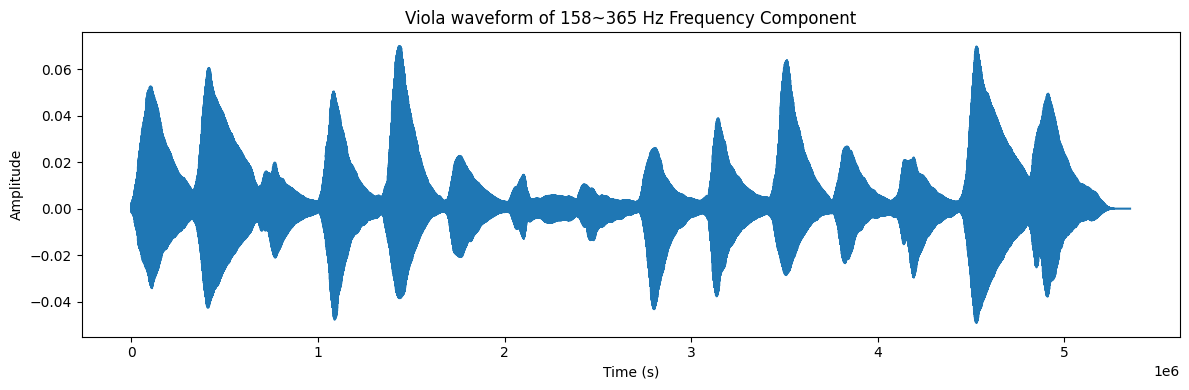

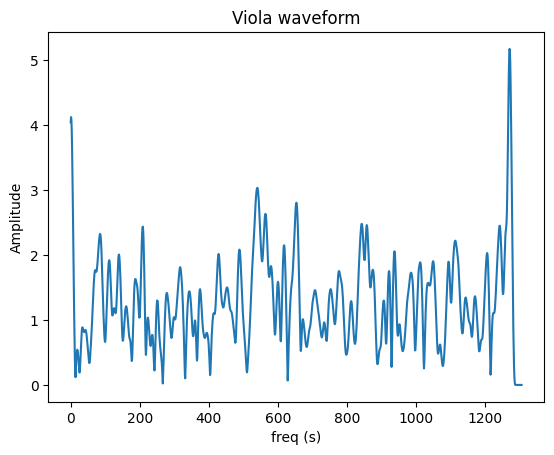

: 

In [32]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio
! pip install midiutil

# 設定要載入的音頻檔案路徑
filename = r"C:\Users\garyhu\Desktop\圓潤audio.wav"

# 設定要提取的特定頻率範圍
target_frequency = (158, 365)  # 包括中央C的頻率範圍

# 載入音頻檔案
audio, sr = librosa.load(filename, sr=None)

# 執行短時傅立葉變換    
stft = np.abs(librosa.stft(audio, hop_length=512, n_fft=2048 * 8))  #如果有問題就提高頻率分辨率

frequencies = librosa.core.fft_frequencies(n_fft=2048*4)  # 取得頻率陣列

#plt.plot(stft[0],stft[1])  # 繪製提取的波形


# 將目標頻率範圍之外的頻率分量置零
start_index = np.argmax(frequencies >= target_frequency[0]) #返回數組中第一個超過頻率下限的數值的索引
end_index = np.argmax(frequencies > target_frequency[1])    #返回數組中第一個超過頻率上限的數值的索引



# 執行逆短時傅立葉變換，得到特定頻率的波形
filtered_audio = librosa.istft(stft)



# 繪製提取的波形
plt.figure(figsize=(12, 4))
plt.plot(filtered_audio)  # 繪製提取的波形
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Viola waveform of {}~{} Hz Frequency Component".format(target_frequency[0],target_frequency[1]))
plt.tight_layout()
plt.show()

db = librosa.amplitude_to_db(stft, ref=np.max)
plt.plot(stft[2])  # 繪製提取的波形
plt.xlabel("freq (s)")
plt.ylabel("Amplitude")
plt.title("Viola waveform")
plt.show()



#filtered_audio_object = librosa.util.buf_to_float(filtered_audio)

# 使用Audio函数播放特定频率范围的音色
#Audio(filtered_audio_object, rate=sr)
Audio(audio,rate=sr)